In [14]:
# Tratamiento de datos
# ================================================================================================================
import os
import numpy as np
import pandas as pd

# Gráficos
# ================================================================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ================================================================================================================
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Tratamiento de imágenes
# ================================================================================================================
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping 

# Evaluación del modelo
# ================================================================================================================
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, auc, roc_curve

# Configuración warnings
# ================================================================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Procesamiento de datos

==================================================================================================

In [2]:
os.getcwd()

'c:\\Users\\hugom\\OneDrive\\Documents\\The Bridge_Data_Science\\Alumno\\3-Machine_Learning\\Kaggle Competitions\\Competition 3'

In [3]:
# Descargamos el dataset

ROOT_PATH = 'C:\\Users\\hugom\\OneDrive\\Documents\\The Bridge_Data_Science\\Alumno\\3-Machine_Learning\\Kaggle Competitions\\Competition 3'

TRAIN_PATH = ROOT_PATH + "\\clips-data\\train"
TEST_PATH = ROOT_PATH + "\\clips-data\\test"
SOLUTION_PATH = ROOT_PATH + "\\clips-data\\solution"

In [4]:
# Definimos las dimensiones de las imágenes
img_width, img_height = 32, 32


# Transformaciones
def define_x(img_folder):
    '''
    -----------------------------------------------------------------------------------------
    Devuelve una "X" con el listado de imágenes a clasificar

    Input: 
    "img_folder": directorio común

    Output:
    "X" en forma de lista, con valores tipo float
    -----------------------------------------------------------------------------------------
    '''
   
    X = list()

   # Iteramos en el directorio, para cada una de las carpetas clasificadoras, 
    for i in os.listdir(img_folder):
        image_path= img_folder + '\\' + i # path de cada imagen
        image= cv2.imread(image_path, cv2.COLOR_BGR2RGB) # Lee la imagen y la transforma al formato de color apropiado
        image=cv2.resize(image, (img_width, img_height),interpolation = cv2.INTER_AREA) # Da a cada imagen la dimensión indicada
        image=np.array(image)
        image = image.astype('float32') # Convierte la imagen a un numpy array, tipo float
        image /= 255 # Normalizamos la imagen a valores entre 0 y 1 (por defecto van de 0 a 255), ayudará al modelo
        X.append(image)

    
    return X


# Definimos las 'X'
X_train = define_x(TRAIN_PATH)
X_test = define_x(TEST_PATH)
X_solution = define_x(SOLUTION_PATH)

In [5]:
# Definimos las 'y'

train_labels = pd.DataFrame(pd.read_csv(ROOT_PATH + '\\clips-data\\train.csv'))
test_labels = pd.DataFrame(pd.read_csv(ROOT_PATH + '\\clips-data\\test.csv'))
solution_labels = pd.DataFrame(pd.read_csv(ROOT_PATH + '\\clips-data\\sample_submission.csv'))

In [6]:
y_train = train_labels['clip_count'].copy()
y_test = test_labels['clip_count'].copy()
y_solution = solution_labels['clip_count'].copy()

In [7]:
# Save data

np.savez(ROOT_PATH + '/data.npz',
        X_train = X_train,
        y_train = y_train,
        X_test = X_test,
        y_test = y_test,
        X_solution = X_solution,
        y_solution = y_solution)
        

In [8]:
# Para utilizarlo

data = np.load(ROOT_PATH + '\\data.npz')
X_train = data['X_train']
X_test = data['X_test']
X_solution = data['X_solution']
y_train = data['y_train']
y_test = data['y_test']
y_solution = data['y_solution']

# 2. Exploración de datos en TRAIN

==================================================================================================

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 201,
 1: 201,
 2: 190,
 3: 231,
 4: 193,
 5: 186,
 6: 210,
 7: 189,
 8: 214,
 9: 206,
 10: 185,
 11: 180,
 12: 179,
 13: 206,
 14: 202,
 15: 213,
 16: 211,
 17: 207,
 18: 219,
 19: 181,
 20: 183,
 21: 189,
 22: 205,
 23: 198,
 24: 192,
 25: 189,
 26: 195,
 27: 214,
 28: 206,
 29: 189,
 30: 206,
 31: 199,
 32: 219,
 33: 185,
 34: 195,
 35: 207,
 36: 202,
 37: 200,
 38: 187,
 39: 214,
 40: 220,
 41: 177,
 42: 188,
 43: 174,
 44: 186,
 45: 207,
 46: 191,
 47: 203,
 48: 186,
 49: 206,
 50: 178,
 51: 204,
 52: 181,
 53: 216,
 54: 220,
 55: 194,
 56: 221,
 57: 214,
 58: 178,
 59: 184,
 60: 202,
 61: 199,
 62: 181,
 63: 191,
 64: 166,
 65: 171,
 66: 211,
 67: 202,
 68: 187,
 69: 232,
 70: 203,
 71: 181,
 72: 193,
 73: 190,
 74: 202,
 75: 183}

In [10]:
class_names = dict(zip(unique, counts)).keys()
class_names

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])

In [11]:
print(X_train.shape)
print(X_test.shape)
print(X_solution.shape)

(15000, 32, 32, 3)
(3000, 32, 32, 3)
(2000, 32, 32, 3)


In [12]:
# Además, cada pixel (tercera profundidad de slicing) tiene valores comprendidos entre 0 y 1
print('máximo valor de pixel en todo X_train:', X_train.max())
print('mínimo valor de pixel en todo X_train:', X_train.min())

máximo valor de pixel en todo X_train: 1.0
mínimo valor de pixel en todo X_train: 0.5686275


# 3. Definición del modelo

==================================================================================================

In [13]:
img_width, img_height = 32, 32


In [15]:
# Regresión en CNN

def create_cnn_regression(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1

	# define the model input
	inputs = layers.Input(shape=inputShape)
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = layers.Conv2D(f, (3, 3), padding="same")(x)
		x = layers.Activation("relu")(x)
		x = layers.BatchNormalization(axis=chanDim)(x)
		x = layers.MaxPooling2D(pool_size=(2, 2))(x)
		
	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = layers.Flatten()(x)
	x = layers.Dense(16)(x)
	x = layers.Activation("relu")(x)
	x = layers.BatchNormalization(axis=chanDim)(x)
	x = layers.Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = layers.Dense(4)(x)
	x = layers.Activation("relu")(x)
	# check to see if the regression node should be added
	if regress:
		x = layers.Dense(1, activation="linear")(x)
	# construct the CNN
	model = keras.Model(inputs, x)
	# return the CNN
	return model

In [17]:
# create our Convolutional Neural Network and then compile the model
# using mean absolute percentage error as our loss, implying that we
# seek to minimize the absolute percentage difference between our
# price *predictions* and the *actual prices*
model = create_cnn_regression(img_width, img_height, 3, regress=True)
model.compile(
    loss = "mean_absolute_percentage_error", 
    optimizer = keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200), 
    metrics = ['mse', 'accuracy'])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640  

In [19]:
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [20]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)

In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 9s 74ms/step - loss: 1796.9659 - accuracy: 0.0130 - val_loss: 1887.8531 - val_accuracy: 0.0173
Epoch 2/10
106/106 [==============================] - 8s 75ms/step - loss: 1595.6554 - accuracy: 0.0130 - val_loss: 2093.0134 - val_accuracy: 0.0173
Epoch 3/10
106/106 [==============================] - 9s 84ms/step - loss: 1166.0831 - accuracy: 0.0129 - val_loss: 1755.4723 - val_accuracy: 0.0173
Epoch 4/10
106/106 [==============================] - 9s 83ms/step - loss: 604.2105 - accuracy: 0.0134 - val_loss: 594.3456 - val_accuracy: 0.0173
Epoch 5/10
106/106 [==============================] - 9s 80ms/step - loss: 243.5722 - accuracy: 0.0133 - val_loss: 273.6593 - val_accuracy: 0.0167
Epoch 6/10
106/106 [==============================] - 8s 80ms/step - loss: 143.1696 - accuracy: 0.0130 - val_loss: 4374.8940 - val_accuracy: 0.0167
Epoch 7/10
106/106 [==============================] - 9s 82ms/step - loss: 134.5366 - accuracy: 0.0130 - val_lo

# Evaluate Model

In [23]:
results = model.evaluate(X_test, y_test)

94/94 [==============================] - 1s 9ms/step - loss: 25.5964 - accuracy: 0.0130


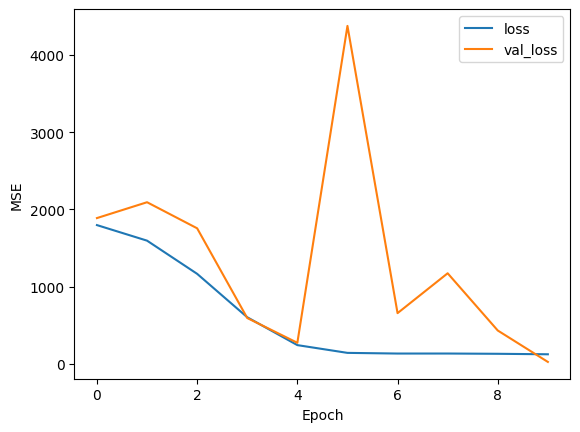

In [24]:
def plot (history):
    plt.style.use('default')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

plot(history)

# Subir Kaggle

In [25]:
predictions_submit = model.predict(X_solution)

predictions = pd.DataFrame(predictions_submit)

submission = pd.DataFrame(solution_labels['id'].copy())
submission['clip_count'] = predictions[0].copy()

In [26]:
submission.shape

(2000, 2)

In [28]:
solution_labels.shape

(2000, 2)

# Chequeator

In [29]:
import urllib.request
from PIL import Image

In [30]:
sample = solution_labels

In [34]:
solution_labels

,id,clip_count
0,48001,27
1,48002,64
2,48003,29
3,48004,43
4,48005,36
...,...,...
1995,49996,53
1996,49997,87
1997,49998,55
1998,49999,27


In [35]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [36]:
chequeator(submission)

You're ready to submit!


In [37]:
solution_hm = submission.to_csv('solution_hm.csv', index=False)